## Desafío - Clasificación desde la econometría


<br>
<br>

Nombre: Julio Valdés

Profesor: Gabriel Tamayo

Generación: G5


* Para poder realizar esta actividad debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

### Descripción


En esta sesión trabajaremos con:
* sbp : Presión Sanguínea Sistólica.
* tobacco : Promedio tabaco consumido por día.
* ldl : Lipoproteína de baja densidad.
* adiposity : Adiposidad.
* famhist : Antecedentes familiares de enfermedades cardiácas. (Binaria)
* types : Personalidad tipo A
* obesity : Obesidad.
* alcohol : Consumo actual de alcohol.
* age : edad.
* chd : Enfermedad coronaria. (dummy)


### Desafío 1: Preparar el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de statsmodels .
* Importe la base de datos southafricanheart.csv  y elimine la columna 'Unnamed: 0'

In [76]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('southafricanheart.csv').drop("Unnamed: 0", axis=1)
df.head(10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


### Desafío 2
A continuación se presenta el siguiente modelo a estimar:

$$\log\left(\frac{p({ chd=1})}{1 - p({ chd=1})}\right)={{\beta }_{0} + {\beta }_{1} \cdot {famhist}}$$


Para ello ejecute los siguientes pasos:

1. Recodifique famhist a dummy, asignando 1 a la categoría minoritaria.
2. Utilice smf.logit para estimar el modelo.
3. Implemente una función inverse_logit que realize el mapeo de log-odds a probabilidad.
4. Con el modelo estimado, responda lo siguiente:
    * ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?
    * ¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria?
    * ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?

Replique el modelo con smf.ols y comente las similitudes entre los coeficientes estimados.

grafique ambas curvas con lmplot



In [77]:
### 1
df['is_famhist_Present'] = np.where(df['famhist'] == 'Present', 1, 0)

### 2
m1_logit = smf.logit('chd ~ is_famhist_Present', df).fit()
print(m1_logit.summary())

### 3
def invlogit(x):
    return 1 / (1 + np.exp(-x))

### 4
estimate_y1 = m1_logit.params['Intercept'] + m1_logit.params['is_famhist_Present'] * 1
estimate_y2 = m1_logit.params['Intercept']
pr1 = invlogit(estimate_y1)
pr2 = invlogit(estimate_y2)
print("La probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria es de {}".format(round(pr1, 3)))
print("La probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria es de {}".format(round(pr2, 3)))
print("La diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes es de {}".format(round(pr2-pr1, 3)))

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            1
Date:                Thu, 11 Jul 2019   Pseudo R-squ.:                 0.05740
Time:                        21:15:30   Log-Likelihood:                -280.95
converged:                       True   LL-Null:                       -298.05
                                        LLR p-value:                 4.937e-09
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.1690      0.143     -8.169      0.000      -1.449      -0.889
is_fa

In [78]:
m1_ols = smf.ols('chd ~ is_famhist_Present', df).fit()
print(m1_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    chd   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     36.86
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           2.66e-09
Time:                        21:15:35   Log-Likelihood:                -294.59
No. Observations:                 462   AIC:                             593.2
Df Residuals:                     460   BIC:                             601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2370      0

#### En la regresión OLS:
* La probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria es de 0.50 al igual que en la regresión logística 
* La probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria es de 0.24 al igual que en la regresión logística
* La diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes es de 0.26 al igual que en la regresión logística

<Figure size 720x432 with 0 Axes>

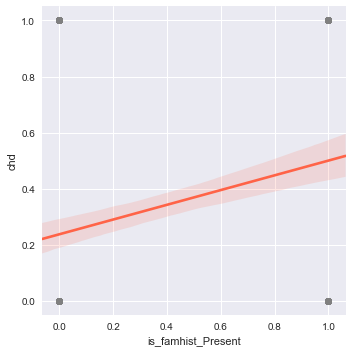

<Figure size 720x432 with 0 Axes>

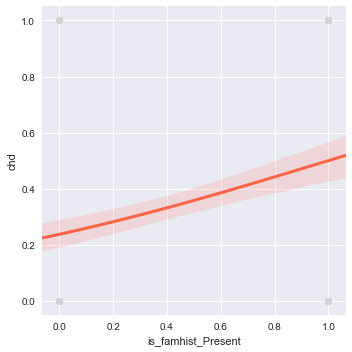

In [79]:
plt.figure()
sns.lmplot('is_famhist_Present','chd', df, 
           line_kws={'color':'tomato'}, scatter_kws={'color': 'grey', 'alpha': .5})

plt.figure()
sns.lmplot('is_famhist_Present', 'chd', df, logistic=True, 
           line_kws={'color':'tomato', 'lw': 3}, scatter_kws={'color': 'lightgrey', 'alpha': .5})

### Desafío 3

Implemente un modelo con la siguiente forma

$$\log\left(\frac{p({ chd=1})}{1 - p({ chd=1})}\right)={{\beta }_{0} + \sum_{j=0}^N {\beta }_{j} \cdot {X}}$$



1. Depure el modelo manteniendo las variables con significancia estadística al 95%.
2. Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria.


In [80]:
m2_logit = smf.logit('chd ~ sbp + tobacco + ldl + adiposity + is_famhist_Present + typea + obesity + alcohol + age', df).fit()
print(m2_logit.summary())
m3_logit = smf.logit('chd ~ tobacco + ldl + is_famhist_Present + typea + age', df).fit()
print(m3_logit.summary())

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Thu, 11 Jul 2019   Pseudo R-squ.:                  0.2080
Time:                        21:15:46   Log-Likelihood:                -236.07
converged:                       True   LL-Null:                       -298.05
                                        LLR p-value:                 2.055e-22
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -6.1507      1.308     -4.701      0.000      -8.715      -3.587
sbp  

#### Los antecedentes familiares de enfermedad cardiaca corresponden a la variable que más impacto tiene en la variable dependiente
#### La cantidad de ldl también importa bastante en la variable dependiente

### Desafío 4: Estimación de perfiles
A partir del modelo depurado, genere las estimaciones en log-odds y posteriormente transfórmelas
a probabilidades con inverse_logit . Los perfiles a estimar son los siguientes:
* La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.
* La probabilidad de tener una enfemerdad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.
* La probabilidad de tener una enfemerdad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.

In [74]:
mean = df.mean()

In [81]:
estimate_y1 = m3_logit.params['Intercept'] + m3_logit.params['tobacco'] * mean['tobacco'] + m3_logit.params['ldl'] * mean['ldl'] + m3_logit.params['is_famhist_Present'] * mean['is_famhist_Present']  + m3_logit.params['typea'] * mean['typea']  + m3_logit.params['age'] * mean['age']
estimate_y2 = m3_logit.params['Intercept'] + m3_logit.params['tobacco'] * mean['tobacco'] + m3_logit.params['ldl'] * df['ldl'].max() + m3_logit.params['is_famhist_Present'] * mean['is_famhist_Present']  + m3_logit.params['typea'] * mean['typea']  + m3_logit.params['age'] * mean['age']
estimate_y3 = m3_logit.params['Intercept'] + m3_logit.params['tobacco'] * mean['tobacco'] + m3_logit.params['ldl'] * df['ldl'].min() + m3_logit.params['is_famhist_Present'] * mean['is_famhist_Present']  + m3_logit.params['typea'] * mean['typea']  + m3_logit.params['age'] * mean['age']
pr1 = invlogit(estimate_y1)
pr2 = invlogit(estimate_y2)
pr3 = invlogit(estimate_y3)
print("La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra es de {}".format(round(pr1, 3)))
print("La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes {}".format(round(pr2, 3)))
print("La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes {}".format(round(pr3, 3)))


La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra es de 0.294
La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes 0.698
La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes 0.184
